# Assignment 2 (A & B)
# Supervised Learning

##### Rishabh Kaushick
##### 002808996
##### November 02, 2023

This assignment covers the following supervised learning models for both Assignment 2A as well as Assignment 2B.

The datasets used for this assignment are as follows:
1. Near Earth Objects Dataset
2. Heart Attack Risk Prediction Dataset

# Assignment 2A

* Decision Trees
* Artificial Neural Networks (ANNs)
* Boosting

In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset #1
### NASA Near Earth Objects Dataset
#### https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

In [2]:
# reading the csv into a python pandas data frame 
neo_dataset_path = 'data/neo_data.csv'
neo_df = pd.read_csv(neo_dataset_path)

In [3]:
# let's see what the first 5 rows of the data looks like
neo_df.head()

,ID,Neo Reference ID,Name,Limited Name,Designation,NASA JPL URL,Absolute Magnitude (H),Min Diameter (km),Max Diameter (km),Min Diameter (m),...,Close Approach Date (Full),Epoch Date Close Approach,Relative Velocity (km/s),Relative Velocity (km/h),Relative Velocity (miles/h),Miss Distance (astronomical),Miss Distance (lunar),Miss Distance (km),Miss Distance (miles),Orbiting Body
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1900-Dec-27 01:30,-2177879400000,5.578619,20083.029075,12478.813260,0.314929,122.507447,4.711273e+07,2.927449e+07,Earth
1,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1907-Nov-05 03:31,-1961526540000,4.394491,15820.167199,9830.036668,0.471486,183.407876,7.053323e+07,4.382732e+07,Earth
2,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1917-Apr-20 21:19,-1663036860000,4.816784,17340.422466,10774.664171,0.499257,194.211053,7.468781e+07,4.640886e+07,Earth
3,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1924-Mar-05 22:13,-1446083220000,4.596055,16545.797588,10280.915173,0.359786,139.956944,5.382329e+07,3.344424e+07,Earth
4,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,22.006703,49.208483,22006.702711,...,1931-Jan-30 04:07,-1228247580000,5.920819,21314.946723,13244.278979,0.174073,67.714454,2.604097e+07,1.618111e+07,Earth


In [4]:
neo_df.describe()

,ID,Neo Reference ID,Designation,Absolute Magnitude (H),Min Diameter (km),Max Diameter (km),Min Diameter (m),Max Diameter (m),Min Diameter (miles),Max Diameter (miles),Min Diameter (feet),Max Diameter (feet),Epoch Date Close Approach,Relative Velocity (km/s),Relative Velocity (km/h),Relative Velocity (miles/h),Miss Distance (astronomical),Miss Distance (lunar),Miss Distance (km),Miss Distance (miles)
count,9.040000e+02,9.040000e+02,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,9.040000e+02,904.000000,904.000000,904.000000,904.000000,904.000000,9.040000e+02,9.040000e+02
mean,2.001662e+06,2.001662e+06,1662.373894,15.329181,3.669706,8.205712,3669.705844,8205.711724,2.280249,5.098791,12039.717721,26921.627253,2.480069e+12,17.859028,64292.500635,39948.859631,0.323131,125.698119,4.833977e+07,3.003694e+07
std,3.509982e+02,3.509982e+02,350.998171,1.751760,5.862900,13.109842,5862.899537,13109.841909,3.643036,8.146076,19235.235316,43011.293730,2.767481e+12,8.362056,30103.402875,18705.083859,0.283816,110.404618,4.245834e+07,2.638239e+07
min,2.000433e+06,2.000433e+06,433.000000,9.260000,0.652462,1.458949,652.461630,1458.948557,0.405421,0.906548,2140.622213,4786.576783,-2.203202e+12,3.263461,11748.458255,7300.035075,0.008305,3.230575,1.242383e+06,7.719812e+05
25%,2.001580e+06,2.001580e+06,1580.000000,14.400000,1.278071,2.857854,1278.070988,2857.853610,0.794156,1.775787,4193.146421,9376.160437,3.390750e+08,12.095361,43543.298582,27056.112388,0.165944,64.552122,2.482483e+07,1.542544e+07
50%,2.001862e+06,2.001862e+06,1862.000000,15.590000,2.025606,4.529393,2025.606009,4529.392731,1.258653,2.814433,6645.689217,14860.212847,2.478576e+12,16.888738,60799.456694,37778.417966,0.302882,117.820935,4.531044e+07,2.815460e+07
75%,2.001865e+06,2.001865e+06,1865.000000,16.590000,3.503926,7.835018,3503.926411,7835.017643,2.177238,4.868453,11495.821927,25705.439285,4.907693e+12,22.819952,82151.825717,51045.949708,0.402945,156.745478,6.027966e+07,3.745605e+07
max,2.001980e+06,2.001980e+06,1980.000000,18.050000,37.372743,83.567994,37372.743191,83567.994282,23.222339,51.926728,122613.990772,274173.218359,7.286594e+12,44.234419,159243.909122,98947.972309,1.979410,769.990481,2.961155e+08,1.839976e+08


In [5]:
neo_df["Is Potentially Hazardous"].describe()

count       904
unique        2
top       False
freq        629
Name: Is Potentially Hazardous, dtype: object

In [6]:
neo_df["Is Potentially Hazardous"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 904 entries, 0 to 903
Series name: Is Potentially Hazardous
Non-Null Count  Dtype
--------------  -----
904 non-null    bool 
dtypes: bool(1)
memory usage: 1.0 KB


In [7]:
# now let's try to plot the column 'Is Potentially Hazardous' and see the class frequency of it
# we use the counter object for finding the frequency of the elements
from collections import Counter
potentially_hazardous_freq = Counter(neo_df["Is Potentially Hazardous"])
potentially_hazardous_freq

Counter({False: 629, True: 275})

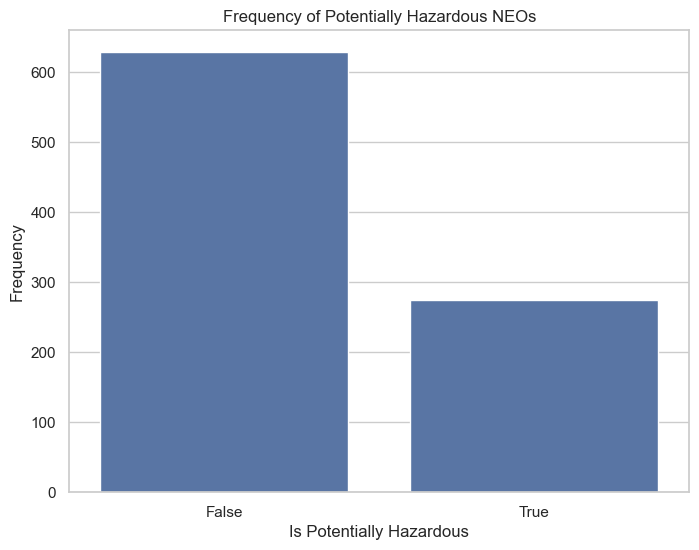

In [8]:
# visualizing the same data above with the help of a bar chart
sns.set(style="whitegrid")
plt.figure(figsize = (8,6))
sns.barplot(x=list(potentially_hazardous_freq.keys()), y=list(potentially_hazardous_freq.values()))
plt.xlabel("Is Potentially Hazardous")
plt.ylabel("Frequency")
plt.title("Frequency of Potentially Hazardous NEOs")
plt.show()

In [9]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            904 non-null    int64  
 1   Neo Reference ID              904 non-null    int64  
 2   Name                          904 non-null    object 
 3   Limited Name                  904 non-null    object 
 4   Designation                   904 non-null    int64  
 5   NASA JPL URL                  904 non-null    object 
 6   Absolute Magnitude (H)        904 non-null    float64
 7   Min Diameter (km)             904 non-null    float64
 8   Max Diameter (km)             904 non-null    float64
 9   Min Diameter (m)              904 non-null    float64
 10  Max Diameter (m)              904 non-null    float64
 11  Min Diameter (miles)          904 non-null    float64
 12  Max Diameter (miles)          904 non-null    float64
 13  Min D

In [10]:
neo_df.nunique()

ID                               20
Neo Reference ID                 20
Name                             20
Limited Name                     20
Designation                      20
NASA JPL URL                     20
Absolute Magnitude (H)           20
Min Diameter (km)                20
Max Diameter (km)                20
Min Diameter (m)                 20
Max Diameter (m)                 20
Min Diameter (miles)             20
Max Diameter (miles)             20
Min Diameter (feet)              20
Max Diameter (feet)              20
Is Potentially Hazardous          2
Close Approach Date             903
Close Approach Date (Full)      904
Epoch Date Close Approach       904
Relative Velocity (km/s)        904
Relative Velocity (km/h)        904
Relative Velocity (miles/h)     904
Miss Distance (astronomical)    904
Miss Distance (lunar)           904
Miss Distance (km)              904
Miss Distance (miles)           904
Orbiting Body                     5
dtype: int64

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Neo Reference ID'}>,
        <Axes: title={'center': 'Designation'}>,
        <Axes: title={'center': 'Absolute Magnitude (H)'}>],
       [<Axes: title={'center': 'Min Diameter (km)'}>,
        <Axes: title={'center': 'Max Diameter (km)'}>,
        <Axes: title={'center': 'Min Diameter (m)'}>,
        <Axes: title={'center': 'Max Diameter (m)'}>],
       [<Axes: title={'center': 'Min Diameter (miles)'}>,
        <Axes: title={'center': 'Max Diameter (miles)'}>,
        <Axes: title={'center': 'Min Diameter (feet)'}>,
        <Axes: title={'center': 'Max Diameter (feet)'}>],
       [<Axes: title={'center': 'Epoch Date Close Approach'}>,
        <Axes: title={'center': 'Relative Velocity (km/s)'}>,
        <Axes: title={'center': 'Relative Velocity (km/h)'}>,
        <Axes: title={'center': 'Relative Velocity (miles/h)'}>],
       [<Axes: title={'center': 'Miss Distance (astronomical)'}>,
        <Axes: title={'cent

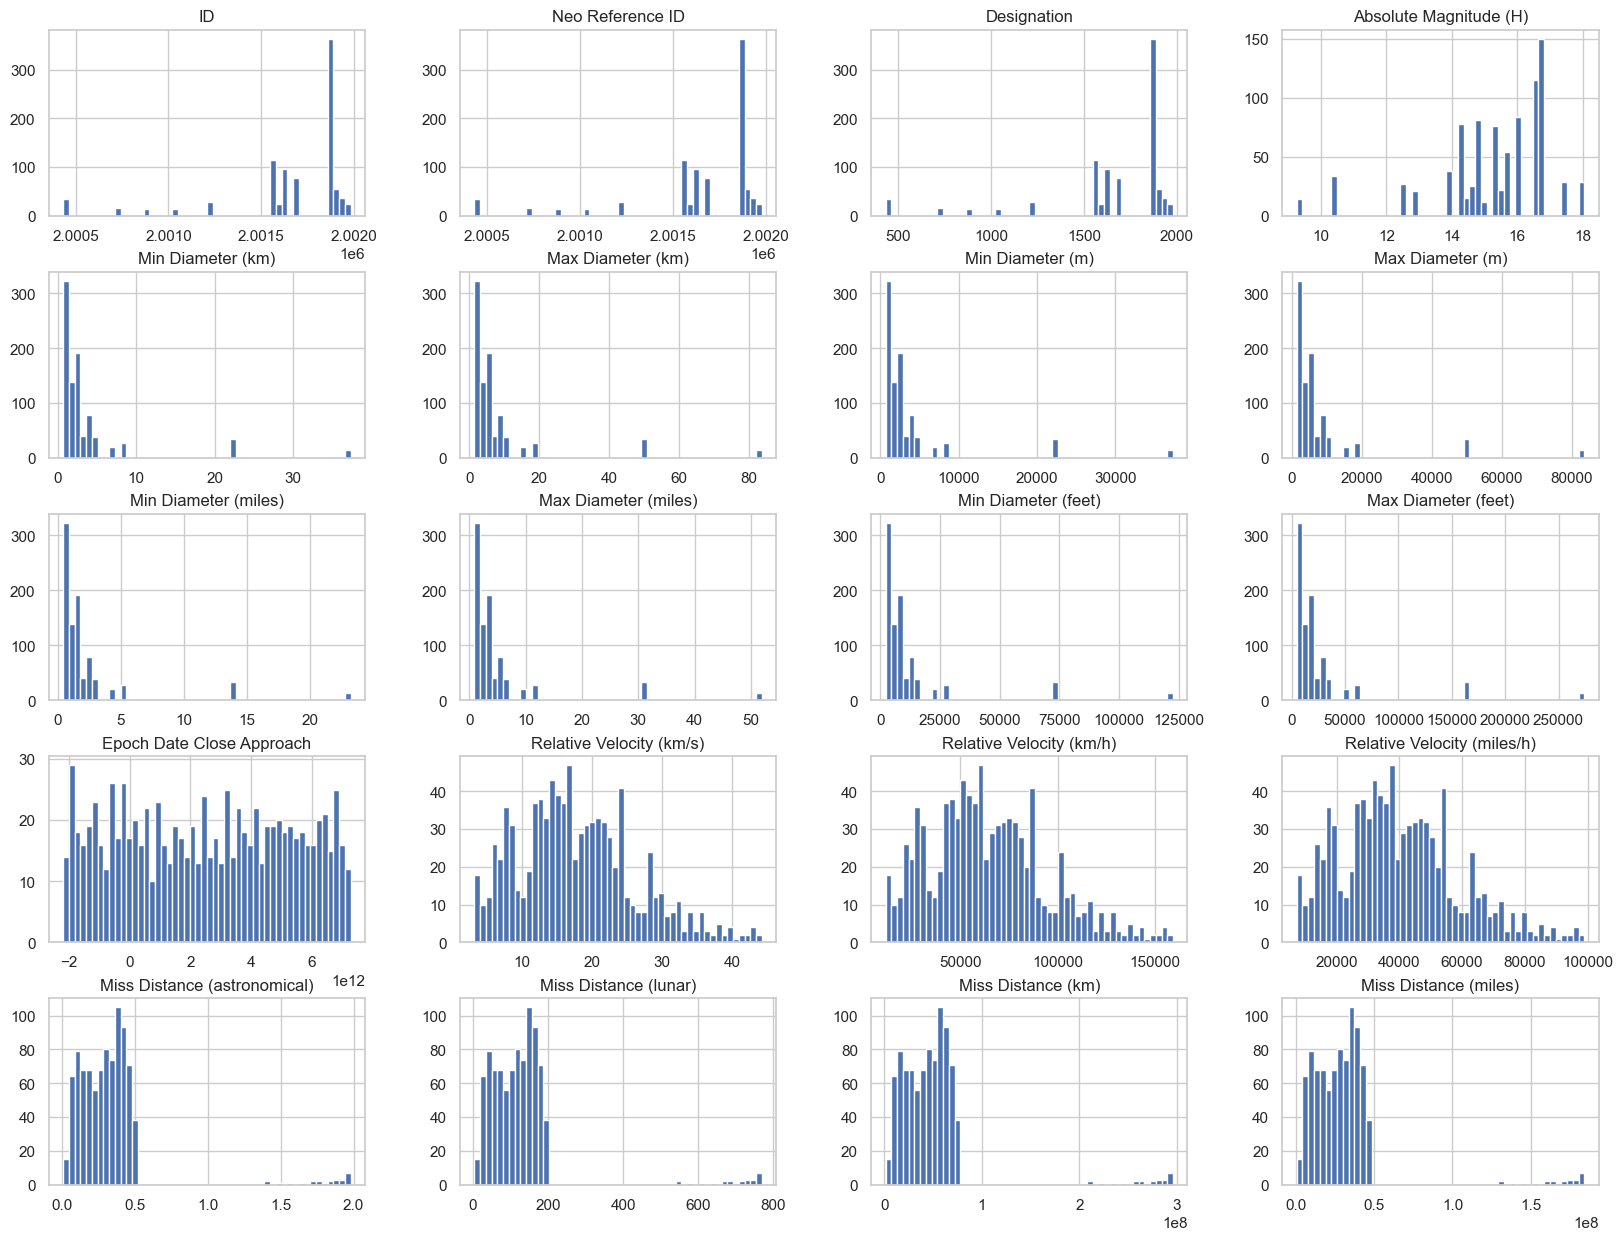

In [11]:
%matplotlib inline
neo_df.hist(bins=50, figsize=(20,15))

In [12]:
# next trying to understand the difference between ID and Neo Reference ID
neo_df["ID"].unique()

array([2000433, 2000719, 2000887, 2001036, 2001221, 2001566, 2001580,
       2001620, 2001627, 2001685, 2001862, 2001863, 2001864, 2001865,
       2001866, 2001915, 2001916, 2001917, 2001943, 2001980])

In [13]:
neo_df["Neo Reference ID"].unique()

array([2000433, 2000719, 2000887, 2001036, 2001221, 2001566, 2001580,
       2001620, 2001627, 2001685, 2001862, 2001863, 2001864, 2001865,
       2001866, 2001915, 2001916, 2001917, 2001943, 2001980])

We can see from the data as well as the above code that the ID column and the Neo Reference IDs both contain the same identical values.
Therefore we can drop one of these columns as well.

In [14]:
# dropping NEO Reference ID
neo_df.drop(columns=["Neo Reference ID"], inplace=True)


In [15]:
# undetstanding the data of 5 rows between 7th and 14th column (Min and Max Diameter in different units)
print(neo_df.iloc[:5, 7:15])

   Max Diameter (km)  Min Diameter (m)  Max Diameter (m)  \
0          49.208483      22006.702711      49208.483223   
1          49.208483      22006.702711      49208.483223   
2          49.208483      22006.702711      49208.483223   
3          49.208483      22006.702711      49208.483223   
4          49.208483      22006.702711      49208.483223   

   Min Diameter (miles)  Max Diameter (miles)  Min Diameter (feet)  \
0             13.674327             30.576724         72200.470524   
1             13.674327             30.576724         72200.470524   
2             13.674327             30.576724         72200.470524   
3             13.674327             30.576724         72200.470524   
4             13.674327             30.576724         72200.470524   

   Max Diameter (feet)  Is Potentially Hazardous  
0        161445.160099                     False  
1        161445.160099                     False  
2        161445.160099                     False  
3        16144

array([[<Axes: title={'center': 'Min Diameter (km)'}>,
        <Axes: title={'center': 'Max Diameter (km)'}>,
        <Axes: title={'center': 'Max Diameter (m)'}>],
       [<Axes: title={'center': 'Min Diameter (m)'}>,
        <Axes: title={'center': 'Min Diameter (miles)'}>,
        <Axes: title={'center': 'Max Diameter (miles)'}>],
       [<Axes: title={'center': 'Min Diameter (feet)'}>,
        <Axes: title={'center': 'Max Diameter (feet)'}>, <Axes: >]],
      dtype=object)

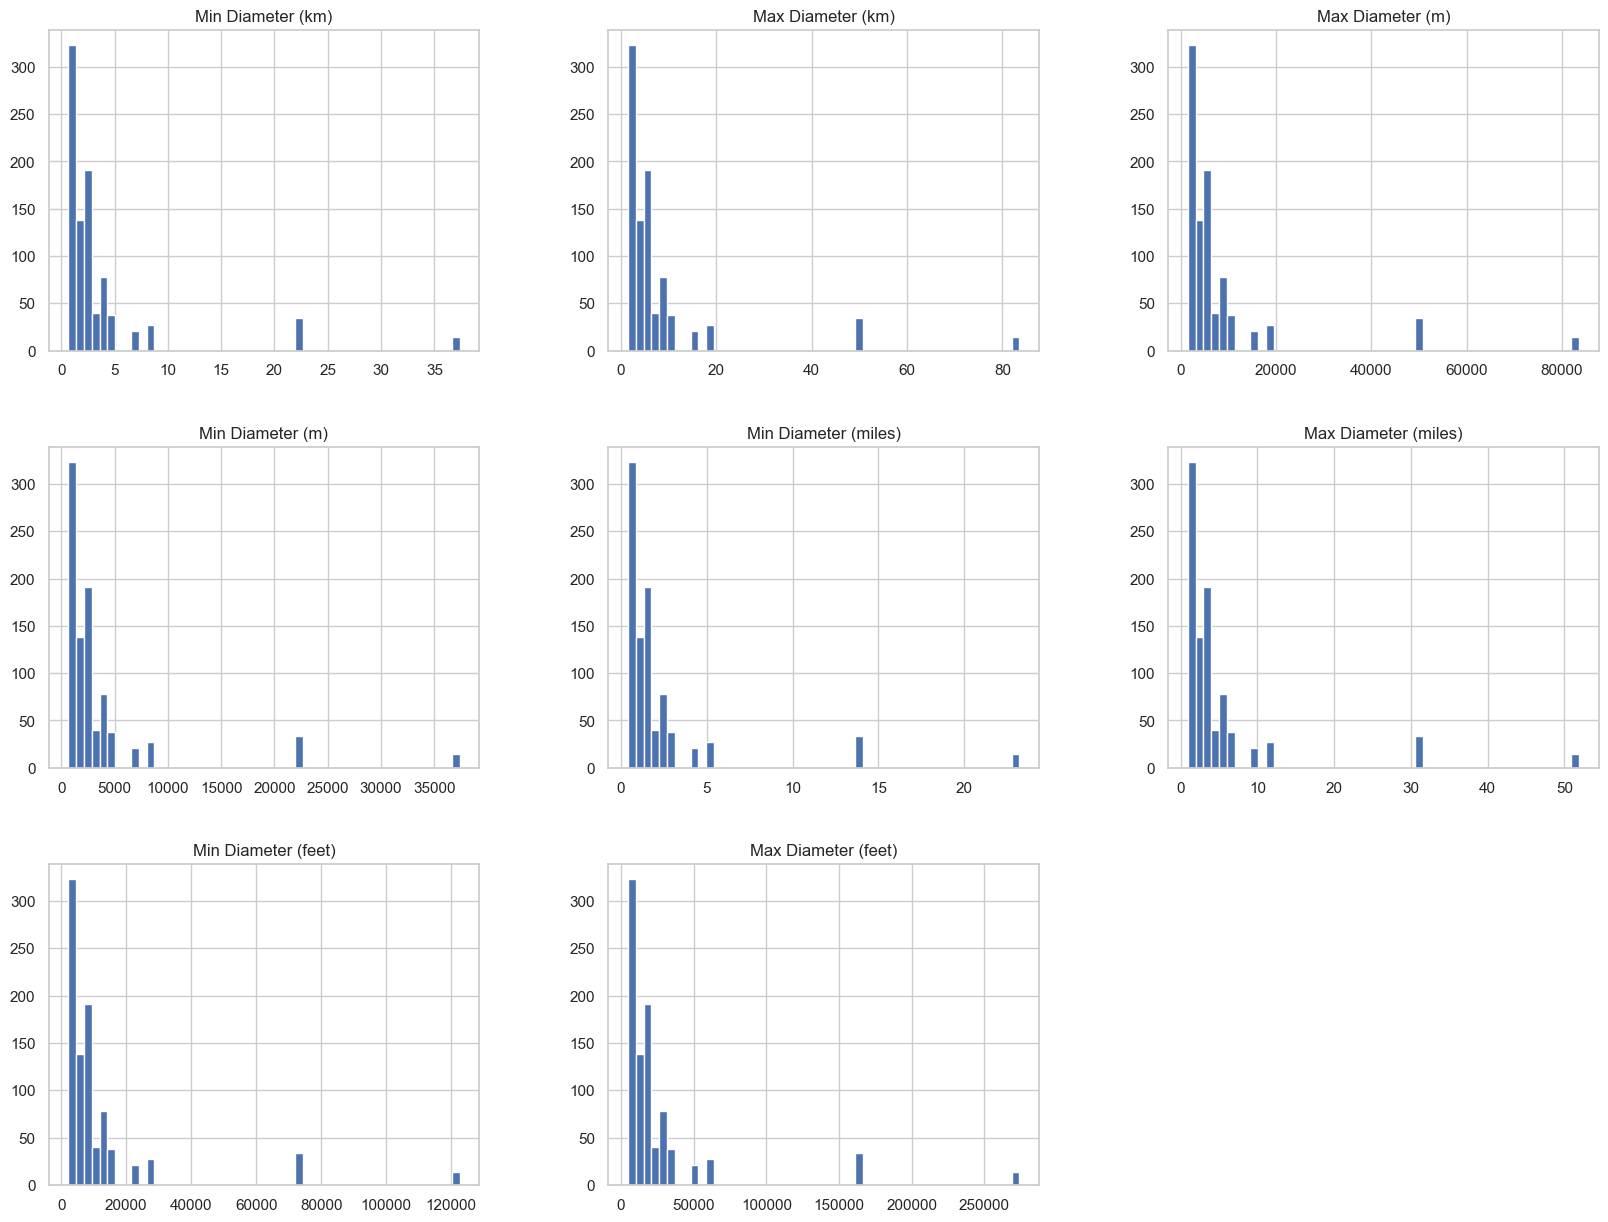

In [16]:
%matplotlib inline
neo_df.hist(column=["Min Diameter (km)", "Max Diameter (km)", "Max Diameter (m)", "Min Diameter (m)", "Min Diameter (miles)", "Max Diameter (miles)", "Min Diameter (feet)", "Max Diameter (feet)"], bins=50, figsize=(20,15))

We have columns with essentially the same data in different units. The graph clearly shows the fields following the same trend. Therefore we will drop all the columns except 'Max Diameter (miles)' & 'Min Diameter (miles)'

In [17]:
neo_df.drop(columns=["Min Diameter (km)", "Max Diameter (km)", "Max Diameter (m)", "Min Diameter (m)", "Min Diameter (feet)", "Max Diameter (feet)"], inplace=True)

In [18]:
# dropping rest of the similar columns
neo_df.drop(columns=["Close Approach Date", "Relative Velocity (km/h)", "Relative Velocity (miles/h)", "Miss Distance (km)", "Miss Distance (lunar)", "Miss Distance (miles)"], inplace=True)

In [19]:
neo_df.drop(columns=["Limited Name"], inplace=True)
neo_df.drop(columns=["NASA JPL URL", "Close Approach Date (Full)"], inplace=True)

In [20]:
# Name is not needed because we have another column called Designation which can uniquely identify each of the NEOs.
neo_df.drop(columns=["Name"], inplace=True)

In [21]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            904 non-null    int64  
 1   Designation                   904 non-null    int64  
 2   Absolute Magnitude (H)        904 non-null    float64
 3   Min Diameter (miles)          904 non-null    float64
 4   Max Diameter (miles)          904 non-null    float64
 5   Is Potentially Hazardous      904 non-null    bool   
 6   Epoch Date Close Approach     904 non-null    int64  
 7   Relative Velocity (km/s)      904 non-null    float64
 8   Miss Distance (astronomical)  904 non-null    float64
 9   Orbiting Body                 904 non-null    object 
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 64.6+ KB


## Preparing the Data for ML Algorithms

In [22]:
# data cleaning

# columns 'Orbiting Body' are in String but they both need to be converted into numeric values for the machine learning models.
neo_df["Orbiting Body"].unique()


array(['Earth', 'Juptr', 'Mars', 'Merc', 'Venus'], dtype=object)

In [23]:
# neo_trainset["Orbiting Body"].unique()
# for this orbiting body field, we can use values from 0 - 4 based on how big the orbiting body is.
# Therefore
# 0 = Merc
# 1 = Mars
# 2 = Venus
# 3 = Earth
# 4 = Juptr

neo_df = neo_df.replace(to_replace="Merc", value=0)
neo_df = neo_df.replace(to_replace="Mars", value=1)
neo_df = neo_df.replace(to_replace="Venus", value=2)
neo_df = neo_df.replace(to_replace="Earth", value=3)
neo_df = neo_df.replace(to_replace="Juptr", value=4)
neo_df["Orbiting Body"].unique()

array([3, 4, 1, 0, 2])

In [24]:
# Converting True and False to 1 and 0 respectively in the Is Potentially Hazardous column
neo_df = neo_df.replace(to_replace=False, value=0)
neo_df = neo_df.replace(to_replace=True, value=1)
neo_df["Is Potentially Hazardous"].unique()

array([0, 1])

In [25]:
# creating a function which splits the data randomly

def split_train_test(data, test_ratio):
    np.random.seed(23) # setting the random number generator's seed will make sure that each time the same test and train set will be considered.
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [26]:
# here we are splitting the data into 80% training and 20% testing sets.
neo_trainset, neo_testset = split_train_test(neo_df, 0.2)

In [27]:
len(neo_trainset)

724

In [28]:
len(neo_testset)

180

In [29]:
neo_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 530 to 595
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            724 non-null    int64  
 1   Designation                   724 non-null    int64  
 2   Absolute Magnitude (H)        724 non-null    float64
 3   Min Diameter (miles)          724 non-null    float64
 4   Max Diameter (miles)          724 non-null    float64
 5   Is Potentially Hazardous      724 non-null    int64  
 6   Epoch Date Close Approach     724 non-null    int64  
 7   Relative Velocity (km/s)      724 non-null    float64
 8   Miss Distance (astronomical)  724 non-null    float64
 9   Orbiting Body                 724 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 62.2 KB


In [30]:
neo_trainset["Orbiting Body"].unique()

array([3, 1, 0, 2, 4])

In [31]:
neo_trainset.nunique()

ID                               20
Designation                      20
Absolute Magnitude (H)           20
Min Diameter (miles)             20
Max Diameter (miles)             20
Is Potentially Hazardous          2
Epoch Date Close Approach       724
Relative Velocity (km/s)        724
Miss Distance (astronomical)    724
Orbiting Body                     5
dtype: int64

In [32]:
corr_matrix = neo_trainset.corr()
corr_matrix

,ID,Designation,Absolute Magnitude (H),Min Diameter (miles),Max Diameter (miles),Is Potentially Hazardous,Epoch Date Close Approach,Relative Velocity (km/s),Miss Distance (astronomical),Orbiting Body
ID,1.000000,1.000000,0.481098,-0.590224,-0.590224,0.020466,0.048058,0.273037,-0.113569,-0.095324
Designation,1.000000,1.000000,0.481098,-0.590224,-0.590224,0.020466,0.048058,0.273037,-0.113569,-0.095324
Absolute Magnitude (H),0.481098,0.481098,1.000000,-0.850776,-0.850776,0.285027,0.010682,0.203993,-0.030900,-0.086891
Min Diameter (miles),-0.590224,-0.590224,-0.850776,1.000000,1.000000,-0.224484,-0.019177,-0.215509,0.050831,0.028507
Max Diameter (miles),-0.590224,-0.590224,-0.850776,1.000000,1.000000,-0.224484,-0.019177,-0.215509,0.050831,0.028507
Is Potentially Hazardous,0.020466,0.020466,0.285027,-0.224484,-0.224484,1.000000,0.029322,0.301948,-0.178075,-0.222278
Epoch Date Close Approach,0.048058,0.048058,0.010682,-0.019177,-0.019177,0.029322,1.000000,0.043425,-0.004879,-0.014830
Relative Velocity (km/s),0.273037,0.273037,0.203993,-0.215509,-0.215509,0.301948,0.043425,1.000000,-0.127830,-0.249569
Miss Distance (astronomical),-0.113569,-0.113569,-0.030900,0.050831,0.050831,-0.178075,-0.004879,-0.127830,1.000000,0.536391
Orbiting Body,-0.095324,-0.095324,-0.086891,0.028507,0.028507,-0.222278,-0.014830,-0.249569,0.536391,1.000000


Understanding the correlation matrix. Let us try to visualize the correlation matrix with different colors, so that it is easier to understand.

In [122]:
corr_matrix.style.background_gradient()

,ID,Designation,Absolute Magnitude (H),Min Diameter (miles),Max Diameter (miles),Is Potentially Hazardous,Epoch Date Close Approach,Relative Velocity (km/s),Miss Distance (astronomical),Orbiting Body
ID,1.000000,1.000000,0.481098,-0.590224,-0.590224,0.020466,0.048058,0.273037,-0.113569,-0.095324
Designation,1.000000,1.000000,0.481098,-0.590224,-0.590224,0.020466,0.048058,0.273037,-0.113569,-0.095324
Absolute Magnitude (H),0.481098,0.481098,1.000000,-0.850776,-0.850776,0.285027,0.010682,0.203993,-0.030900,-0.086891
Min Diameter (miles),-0.590224,-0.590224,-0.850776,1.000000,1.000000,-0.224484,-0.019177,-0.215509,0.050831,0.028507
Max Diameter (miles),-0.590224,-0.590224,-0.850776,1.000000,1.000000,-0.224484,-0.019177,-0.215509,0.050831,0.028507
Is Potentially Hazardous,0.020466,0.020466,0.285027,-0.224484,-0.224484,1.000000,0.029322,0.301948,-0.178075,-0.222278
Epoch Date Close Approach,0.048058,0.048058,0.010682,-0.019177,-0.019177,0.029322,1.000000,0.043425,-0.004879,-0.014830
Relative Velocity (km/s),0.273037,0.273037,0.203993,-0.215509,-0.215509,0.301948,0.043425,1.000000,-0.127830,-0.249569
Miss Distance (astronomical),-0.113569,-0.113569,-0.030900,0.050831,0.050831,-0.178075,-0.004879,-0.127830,1.000000,0.536391
Orbiting Body,-0.095324,-0.095324,-0.086891,0.028507,0.028507,-0.222278,-0.014830,-0.249569,0.536391,1.000000


### Visualizing the data

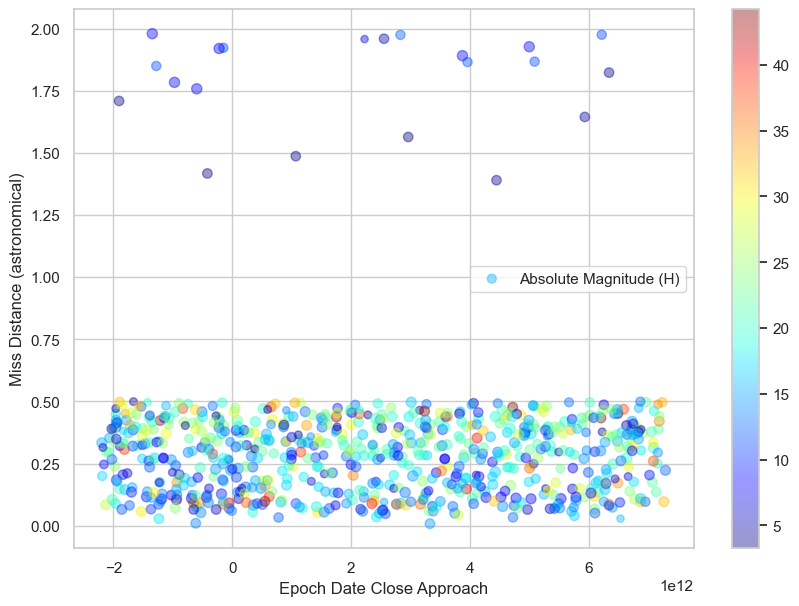

In [34]:

neo_trainset.plot(kind="scatter", x="Epoch Date Close Approach", y="Miss Distance (astronomical)", alpha=0.4,
            s=neo_trainset["Absolute Magnitude (H)"]*3, label="Absolute Magnitude (H)", figsize=(10,7),
            c=neo_trainset["Relative Velocity (km/s)"], colormap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


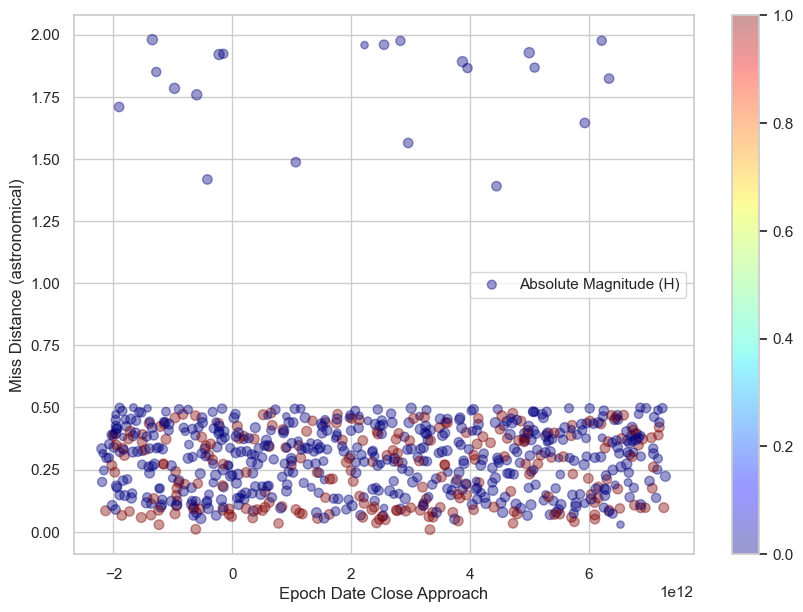

In [35]:
neo_trainset.plot(kind="scatter", x="Epoch Date Close Approach", y="Miss Distance (astronomical)", alpha=0.4,
            s=neo_trainset["Absolute Magnitude (H)"]*3, label="Absolute Magnitude (H)", figsize=(10,7),
            c=neo_trainset["Is Potentially Hazardous"], colormap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

## Machine Learning Model
### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
y_train = neo_trainset["Is Potentially Hazardous"]
X_train = neo_trainset.drop(columns="Is Potentially Hazardous")

tree_clf = DecisionTreeClassifier(max_depth=5, max_features="sqrt", random_state=23, splitter="random")
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=23,
                       splitter='random')

The Decision Tree model is trained. Now to view the tree we must do the following:

In [38]:
from sklearn.tree import export_graphviz


export_graphviz(
        tree_clf,
        out_file="neo_tree_2.dot",
        feature_names= X_train.columns.values.tolist(),
        class_names= "Is Potentially Hazardous",
        rounded=True,
        filled=True
    )


In [39]:
# now letting the system predict the values

# labels = neo_trainset["Is Potentially Hazardous"]
# testing_values = neo_trainset.drop(columns="Is Potentially Hazardous")

predictions = tree_clf.predict(X_train)
predictions


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
from sklearn.metrics import mean_squared_error
tree_mean_sq_error = mean_squared_error(y_train, predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

0.2290986421725451

This means that the training error is 22.9%, and therefore the training accuracy is 77.1%.

In [42]:
y_test = neo_testset["Is Potentially Hazardous"]
X_test = neo_testset.drop(columns="Is Potentially Hazardous")

predictions = tree_clf.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [43]:
tree_mean_sq_error = mean_squared_error(y_test, predictions)
tree_root_mean_sq_err = np.sqrt(tree_mean_sq_error)
tree_root_mean_sq_err

0.22360679774997896

Similarly, our testing error is 22.36%, therefore testing accuracy is 77.64%.

From the above details, we can see that the training and the testing accuracy are almost the same. This shows that our decision tree model has generalized well on the data and has not overfit on the training data.

## ANNs

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
ann_model = keras.models.Sequential()
ann_model.add(keras.layers.Dense(50, activation="relu"))
ann_model.add(keras.layers.Dense(25, activation="relu"))
ann_model.add(keras.layers.Dense(10, activation="relu"))
ann_model.add(keras.layers.Dense(5, activation="relu"))
ann_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [48]:
# similar to the above decision tree example, we are adding the loss to be binary cross entropy using the adam optimizer
ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# now running the training on the ANNs
# we will train the neural network 20 times with a batch size of 5. 
ann_model.fit(X_train, y_train, epochs=20, batch_size=5)

Epoch 1/20
145/145 [==============================] - 0s 622us/step - loss: 3083731712.0000 - accuracy: 0.6174
Epoch 2/20
145/145 [==============================] - 0s 583us/step - loss: 633184832.0000 - accuracy: 0.6754
Epoch 3/20
145/145 [==============================] - 0s 602us/step - loss: 422525920.0000 - accuracy: 0.6630
Epoch 4/20
145/145 [==============================] - 0s 609us/step - loss: 217772016.0000 - accuracy: 0.6823
Epoch 5/20
145/145 [==============================] - 0s 624us/step - loss: 316333664.0000 - accuracy: 0.6657
Epoch 6/20
145/145 [==============================] - 0s 757us/step - loss: 336578272.0000 - accuracy: 0.6630
Epoch 7/20
145/145 [==============================] - 0s 750us/step - loss: 177327664.0000 - accuracy: 0.6644
Epoch 8/20
145/145 [==============================] - 0s 756us/step - loss: 1864557.3750 - accuracy: 0.6699
Epoch 9/20
145/145 [==============================] - 0s 761us/step - loss: 1750035.2500 - accuracy: 0.6657
Epoch 10/20
1

In [50]:
loss, accuracy = ann_model.evaluate(X_train, y_train)
print(accuracy)

23/23 [==============================] - 0s 537us/step - loss: 0.6194 - accuracy: 0.6975
0.6975138187408447


The ANN model has a training accuracy of 69.75%

In [51]:
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test)
test_accuracy

6/6 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6889


0.6888889074325562

The testing accuracy of the ANN model is 68.88%

We can see that this is a good model. The train and test accuracy is very close to each other therefore we can say with certainty that it has not overfit the data.

We can see that the Decision Tree model was better able to predict the data as compared to the ANN model.

In [52]:
# let's try to improve the accuracy for the ANN model

# Assignment 2B
This assignment covers the following algorithms on the following datasets:
1. Dataset #1   -   Ada Boost (Adaptive Boosting), Gradient Boosting
2. Dataset #2   -   Decision Trees
3. Dataset #2   -   Artificial Neural Networks
4. Dataset #2   -   Ada Boost (Adaptive Boosting)
5. Dataset #1   -   Support Vector Machines (SVMs)
6. Dataset #1   -   K-Nearest Neighbors (KNNs)
7. Dataset #2   -   Support Vector Machines (SVMs)
8. Dataset #2   -   K-Nearest Neighbors (KNNs)

## Boosting - AdaBoost (Adaptive Boosting) 

This algorithm was missed in the Assignment 2A, hence coevered in Assignment 2B

In [53]:
# importing AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

In [99]:
# Training the AdaBoost Classifier using the same X and y values
adaboost_clf = AdaBoostClassifier(random_state=0, n_estimators=100)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [100]:
print("Accuracy on training set: {:.3f}".format(adaboost_clf.score(X_train, y_train)))

Accuracy on training set: 1.000


In [101]:
print("Accuracy on test set: {:.3f}".format(adaboost_clf.score(X_test, y_test)))

Accuracy on test set: 1.000


In [94]:
print("Accuracy on test set: {:.10f}".format(adaboost_clf.score(X_test, y_test)))

Accuracy on test set: 1.0000000000


In [95]:
# let's create another model
adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=1)
# learning rate = 1 means it will start as a weak classifier

adaboost_model = adaboost_classifier.fit(X_train, y_train)

In [97]:
# predicting
y_train_predictions = adaboost_model.predict(X_train)
y_train_predictions

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [98]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_train, y_train_predictions))

Accuracy: 1.0


It looks like the AdaBoost Classifier was able to get 100% accuracy on both the training and test sets.


Whenever the training error becomes 100%, usually it means that it is overfitting the data. In theory Ada-Boost is very unlikely to overfit the data. Therefore we tested the model with the test-set. Surprisingly the test set also was able to get 100% accuracy.

In order to really see if this is true, I am training another model with different set of parameters.

In [59]:
ada_boost_clf2 = AdaBoostClassifier(random_state=23, n_estimators=50)
ada_boost_clf2.fit(X_train, y_train)

AdaBoostClassifier(random_state=23)

In [60]:
print("Accuracy on training set: {:.3f}".format(adaboost_clf.score(X_train, y_train)))

Accuracy on training set: 1.000


In [61]:
print("Accuracy on test set: {:.3f}".format(adaboost_clf.score(X_test, y_test)))

Accuracy on test set: 1.000


Still we are getting the same 100% accuracy on the train and the test datasets.

Trying to get the with a different split value.

In [62]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(neo_df.drop(columns="Is Potentially Hazardous"), neo_df['Is Potentially Hazardous'], random_state=0)

In [63]:
ada_boost_clf3 = AdaBoostClassifier(n_estimators=100, random_state=5)
ada_boost_clf3.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=5)

In [64]:
# let's see how it is predicting the values
ada_boost_clf3.predict(X_train_new)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [72]:
y_train_new.head(10)

278    1
231    0
893    0
832    0
39     0
740    0
572    0
18     0
316    1
156    1
Name: Is Potentially Hazardous, dtype: int64

In [73]:
ada_boost_clf3.score(X_train_new, y_train_new)

1.0

In [74]:
ada_boost_clf3.score(X_test_new, y_test_new)

1.0

Even with a different set of train and test split, the Ada-Boost model is still able to correctly predit the train and the test data with 100% accuracy.

Therefore, let us explore one more boosting algorithm:

## Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gradient_boost_clf = GradientBoostingClassifier(random_state=0, max_depth=1)
# when max_depth = 1 - it will create a weak learner

# now training the gradient boosting model:
gradient_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [77]:
print("Accuracy on training set: {:.3f}".format(gradient_boost_clf.score(X_train, y_train)))

Accuracy on training set: 1.000


In [78]:
print("Accuracy on test set: {:.3f}".format(gradient_boost_clf.score(X_test, y_test)))

Accuracy on test set: 1.000


It looks even like the gradient boosting algorithm also is able to get 100 % accuracy on train and test data.

## K-Nearest Neighbor Classifier (KNNs)

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
# let us try to predict the values for different set of neighbor parameters
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [110]:
# Let us test the training accuracy of 3-Neighbors Classifier
print('Training accuracy of KNN with k = 3: {:.3f}', format(knn_clf.score(X_train, y_train)))

Training accuracy of KNN with k = 3: {:.3f} 0.7734806629834254


/opt/homebrew/anaconda3/envs/info6105/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [112]:
# Let us try training the data with k = 5
knn_clf_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_5.fit(X_train, y_train)

KNeighborsClassifier()

In [113]:
print('Training accuracy of KNN with k = 5: {:.3f}', format(knn_clf_5.score(X_train, y_train)))

Training accuracy of KNN with k = 5: {:.3f} 0.7430939226519337


/opt/homebrew/anaconda3/envs/info6105/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [114]:
# Let us try training the data with k = 10
knn_clf_10 = KNeighborsClassifier(n_neighbors=10)
knn_clf_10.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [116]:
print('Training accuracy of KNN with k = 10: {:.3f}', format(knn_clf_10.score(X_train, y_train)))

Training accuracy of KNN with k = 10: {:.3f} 0.7099447513812155


/opt/homebrew/anaconda3/envs/info6105/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


From the above examples, we can see that as the value of K inreases, the training accuracy reduces.

Now let us try to see the testing accuracy for each KNN classifier.

In [118]:
print("KNN Classifier Accuracy")
print('k = 3 \n Training accuracy: {:.3f} \t Testing accuracy: {:.3f}'.format(knn_clf.score(X_train, y_train), knn_clf.score(X_test, y_test)))
print('k = 5 \n Training accuracy: {:.3f} \t Testing accuracy: {:.3f}'.format(knn_clf_5.score(X_train, y_train), knn_clf_5.score(X_test, y_test)))
print('k = 10 \n Training accuracy: {:.3f} \t Testing accuracy: {:.3f}'.format(knn_clf_10.score(X_train, y_train), knn_clf_10.score(X_test, y_test)))


KNN Classifier Accuracy
k = 3 
 Training accuracy: 0.773 	 Testing accuracy: 0.622
k = 5 
 Training accuracy: 0.743 	 Testing accuracy: 0.606
k = 10 
 Training accuracy: 0.710 	 Testing accuracy: 0.683


/opt/homebrew/anaconda3/envs/info6105/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/envs/info6105/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

From the above result, we can see that when k=3, the training accuracy is very high at 77.3 % however the testing accuracy is only 62.2 %.

As we increase the value of k, the training accuracy reduces, however the testing accuracy increases. Therefore we need to find the sweet spot where the training accuracy is also almost equal to the testing accuracy.

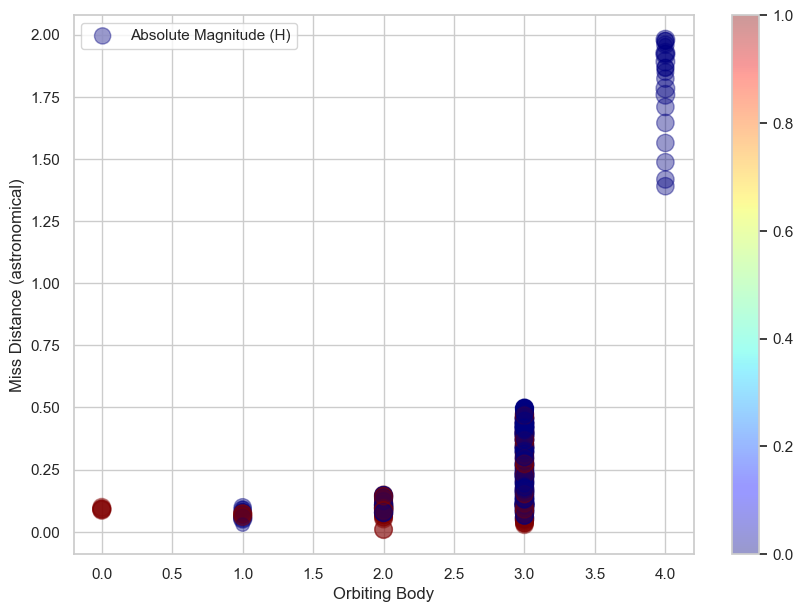

In [121]:
# Let us try to visualize the data in a graph
neo_trainset.plot(kind="scatter", x="Orbiting Body", y="Miss Distance (astronomical)", alpha=0.4,
            s=neo_trainset["Absolute Magnitude (H)"]*10, label="Absolute Magnitude (H)", figsize=(10,7),
            c=neo_trainset["Is Potentially Hazardous"], colormap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


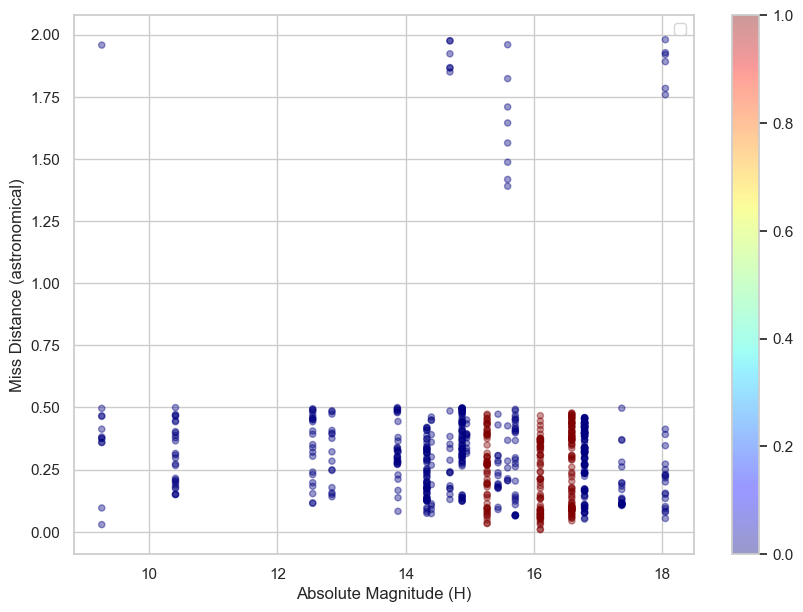

In [123]:
# Let us try to visualize the data in a graph
neo_trainset.plot(kind="scatter", x="Absolute Magnitude (H)", y="Miss Distance (astronomical)", alpha=0.4,
            figsize=(10,7),
            c=neo_trainset["Is Potentially Hazardous"], colormap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


## Support Vector Machines (SVMs)

In [153]:
from sklearn.svm import LinearSVC
# Linear SVC is a support vector classifier - where kernel = linear

In [154]:
linear_svm = LinearSVC(max_iter=2000).fit(X_train, y_train)

/opt/homebrew/anaconda3/envs/info6105/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [155]:
linear_svm.score(X_train, y_train)

0.5828729281767956

In [156]:
linear_svm.score(X_test, y_test)

0.6277777777777778

The above was using the linear support vector classifier. Let us try the same with RBF Support Vector Classifier

In [171]:
from sklearn.svm import SVC

In [158]:
svm_clf = SVC(kernel='rbf', C=1, gamma=1).fit(X_train, y_train)

In [159]:
svm_clf.score(X_train, y_train)

1.0

In [160]:
svm_clf.score(X_test, y_test)

0.6888888888888889

Let us change the parameters of the SVM because this is overfitting the data.

In [175]:
svm_clf_2 = SVC(kernel='rbf', C=10, gamma=100).fit(X_train, y_train)

In [176]:
svm_clf_2.score(X_train, y_train)

1.0

In [177]:
svm_clf_2.score(X_test, y_test)

0.6888888888888889

## Results
From the above models we can see:
1. Decision Tree:
    * Train Accuracy:           77.10 %
    * Test Accuracy:            77.64 %
2. Artificial Neural Networks
    * Train Accuracy:           69.75 %
    * Test Accuracy:            68.88 %
3. Ada Boost
    * Train Accuracy:           100 %
    * Test Accuracy:            100 %
4. Gradient Boosting
    * Train Accuracy:           100 %
    * Test Accuracy:            100 %
5. K-Nearest Neighbors
    * Train Accuracy:            %
    * Test Accuracy:             %
6. Support Vector Machines
    * Train Accuracy:            %
    * Test Accuracy:             %

## Dataset #2
### Heart Attack Risk Prediction Dataset
#### https://www.kaggle.com/datasets/shivd24coder/nasa-neo-near-earth-object-dataset/data

In [102]:
# reading the second dataset into dataframe objects
heart_dataset_path = 'data/heart_attack_prediction_dataset.csv'
heart_df = pd.read_csv(heart_dataset_path)

In [103]:
# Fist 5 rows
heart_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [104]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
heart_df.describe()

In [ ]:
heart_df["Heart Attack Risk"].info()

In [ ]:
heart_df["Heart Attack Risk"].describe()

In [ ]:
# similar to the previous dataset, we find the frequency of the output variable 'Heart Attack Risk'
ha_risk_freq = Counter(heart_df["Heart Attack Risk"])
ha_risk_freq

In [ ]:
sns.set(style="dark")
plt.figure(figsize = (8,6))
sns.barplot(x=list(ha_risk_freq.keys()), y=list(ha_risk_freq.values()))
plt.xlabel("Heart Attack Risk")
plt.ylabel("Frequency")
plt.title("Frequency of Heart Attack Risks")
plt.show()